# Order Book Dynamics

In this notebook, we explore how electronic markets actually match buyers and sellers. We'll use plain English and avoid heavy math.

## 1. Order Types

- **Limit Orders**
  - You say how much you want to trade *and* the exact price you’re willing to pay or accept.
  - Your order patiently waits in the electronic "book" until someone matches your price.
  - You can cancel it at any time if it doesn't fill.

- **Market Orders**
  - You tell the system, “Fill my trade right now at the best available price.”
  - This guarantees speed, not price—you might sweep through multiple price levels to get your size filled.
  - Market orders take liquidity; limit orders make liquidity.

## 2. The Bid–Ask Spread

- At any moment, the top **buy** price in the book is the **Bid**.
- The top **sell** price is the **Ask**.
- The **spread** is simply: Ask minus Bid.

- **Tight spreads** (small difference) mean low cost to trade immediately.
- **Wide spreads** mean higher implicit costs: if you buy at the ask and flip to sell at the bid, you lose that difference.

## 3. Picking a Simple "Price"

- **Midprice**
  - (Bid + Ask) / 2 provides a quick snapshot of where the market sits. # hallway between the best bid (highest price someone’s willing to pay) and best ask (lowest price someone’s willing to sell at)

- **Microprice**
  - We weight the bid and ask by how many shares are sitting at each level.
  - If there’s a big pile of bids but only a few asks, the microprice shifts toward the ask, hinting at hidden buying pressure.

  Instead of treating bid and ask equally, this gives more weight to whichever side has more orders waiting. So, if there’s a huge stack of buy orders at the bid price but only a few sell orders at the ask, the microprice will sit closer to the ask. That shift is a little "nudge" (I enjoy this word) telling you there’s more buying interest lurking behind the scenes...potentially foreshadowing a price move

## 4. Why It Matters

- **Execution cost**: Market orders pay the spread (buy right now at whatever’s available, small fee for the immediate service); limit orders earn it (I’m only willing to buy at X or sell at Y, earn the same spread because someone else is paying to get it filled instantly).
- **Liquidity**: The depth of the book tells you how big an order you can place without moving the price too much. Order book is like a stack of price buckets, each with some amount of shares waiting. The deeper the cukets, the more shares you can trade at that price without shifting the market.
- **Market signals**: Changes in the spread and book shape often signal upcoming volatility or large trades. When the spread suddenly widens or the shape of the book changes (lots of new orders appear on one side, and so forth) means someone big is about to trade (known traders, warren buffet, etc). Can be an early warning of big price swings.

In [6]:
# Load and prepare BNB/USDT 1-minute data (last 30 days)
import pandas as pd

path = '/Users/mchildress/Active Code/ts_basics/data/bnbusdt_1m.csv'
df = (
    pd.read_csv(path, parse_dates=['timestamp'])
      .set_index('timestamp')
      .sort_index()
      .iloc[-30*24*60:]   # keep only last 30 days
)

df.head()

/var/folders/yj/3s0hc5nn3qlg4lqp7wmfgq_c0000gn/T/ipykernel_38699/97145784.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.read_csv(path, parse_dates=['timestamp'])


,open_time,close_time,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
timestamp,,,,,,,,,,,
1733184000,2024-12-03 00:00:00,2024-12-03 00:00:59.999,647.83,647.90,647.40,647.50,238.678,154603.77904,1339,122.725,79499.17284
1733184060,2024-12-03 00:01:00,2024-12-03 00:01:59.999,647.49,647.74,646.95,646.95,720.278,466262.72593,1557,218.095,141199.32062
1733184120,2024-12-03 00:02:00,2024-12-03 00:02:59.999,646.96,647.10,646.34,646.46,680.271,440060.87315,1432,215.725,139551.70227
1733184180,2024-12-03 00:03:00,2024-12-03 00:03:59.999,646.47,647.38,646.46,647.17,431.971,279484.75885,1491,202.916,131276.48500
1733184240,2024-12-03 00:04:00,2024-12-03 00:04:59.999,647.17,648.00,647.17,647.82,334.872,216900.13950,1064,264.481,171299.55401


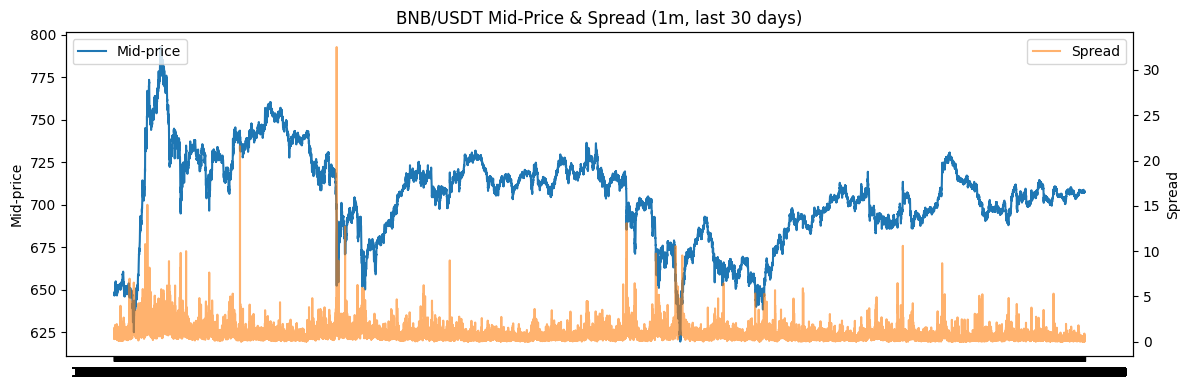

In [7]:
# Compute midprice and spread
df['midprice'] = (df['high'] + df['low']) / 2
df['spread']   = df['high'] - df['low']

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
ax = plt.gca()
ax.plot(df.index, df['midprice'], label='Mid-price', color='C0')
ax.set_ylabel('Mid-price')

ax2 = ax.twinx()
ax2.plot(df.index, df['spread'], label='Spread', color='C1', alpha=0.6)
ax2.set_ylabel('Spread')

ax.set_title('BNB/USDT Mid-Price & Spread (1m, last 30 days)')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

## 5. Analysis

- **Mid-Price Trend**: Over the last 30 days, the mid-price for BNB/USDT has moved between about 620 and 780. We see clear periods of rising price (early spikes) followed by consolidations where the price bounces in a range.
- **Spread Behavior**: Most of the time, the spread stays low (under 5), indicating the market is liquid and you can trade quickly with very little cost. 
- **Spread Spikes**: Large spikes in the spread (sometimes above 20 or even 30) hint at moments of lower liquidity or volatility—perhaps around big news events or when order-book updates slowed down. During those spikes, placing a market order would be noticeably more expensive.
- **Takeaways**:
  - If you trade during low-spread periods, you pay only a tiny fee in the bid–ask difference.
  - If the spread jumps up, it’s a sign to pause or switch to limit orders, since market orders can cost a lot more.